Sous-ensembles de caractéristiques aléatoires et performances de validation croisée :
Nombre de caractéristiques : 9
Caractéristiques sélectionnées : ['cap-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'ring-number', 'ring-type', 'spore-print-color', 'population']
Score de précision de validation croisée : 0.89903417961349

Nombre de caractéristiques : 13
Caractéristiques sélectionnées : ['cap-surface', 'cap-color', 'bruises', 'gill-attachment', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'veil-type', 'veil-color', 'ring-type', 'population']
Score de précision de validation croisée : 0.9138125047366426

Nombre de caractéristiques : 22
Caractéristiques sélectionnées : ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-

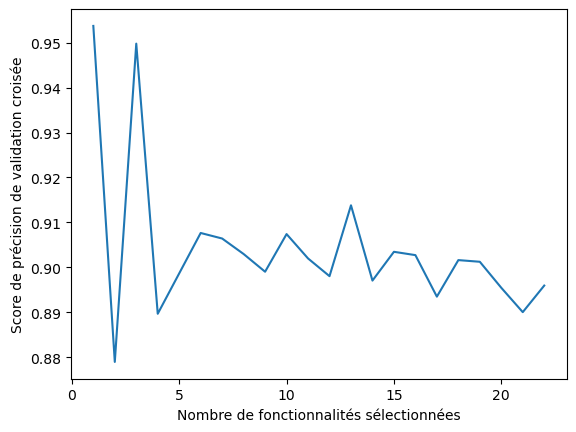

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder                               
import matplotlib.pyplot as plt
import pandas as pd
import random


data_set = pd.read_csv('mushrooms.csv')

data = data_set.copy()


label_encoder = LabelEncoder()


for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])


X = data.drop('class', axis=1)
y = data['class']


clf = RandomForestClassifier()

rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')

rfecv.fit(X, y)


feature_indices = list(range(len(X.columns)))

num_subsets_to_display = 100  # il fallait donner 2puissance nbr_features mais ca bloque

print("Sous-ensembles de caractéristiques aléatoires et performances de validation croisée :")
for _ in range(num_subsets_to_display):

    random_subset = random.sample(feature_indices, random.randint(1, len(feature_indices)))
    features_subset = [index for index, value in enumerate(rfecv.support_) if index in random_subset]
    print(f"Nombre de caractéristiques : {len(features_subset)}")
    print(f"Caractéristiques sélectionnées : {X.columns[features_subset].tolist()}")
    print(f"Score de précision de validation croisée : {rfecv.cv_results_['mean_test_score'][len(features_subset) - 1]}\n")




print("Caractéristiques sélectionnées :", X.columns[rfecv.support_])
print("Nombre optimal de fonctionnalités :", rfecv.n_features_)


plt.figure()
plt.xlabel("Nombre de fonctionnalités sélectionnées")
plt.ylabel("Score de précision de validation croisée")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()
